<center>
<img src="https://www.worldatlas.com/r/w1200-h701-c1200x701/upload/f6/53/ad/shutterstock-237232216.jpg" width=600px/>
<br />
<h1>Секрет выживания на Титанике </h1>
<br />


In [136]:
# # uncomment this to download and extract the data:
# ! wget --no-check sertificate "https://docs.google.com/uc?export=download&id=1R49J32xkR338rAFtC__I39qud5kHEkIm" -O titanic.zip -q
# ! unzip titanic.zip

In [137]:
import numpy as np
import pandas as pd
import sklearn

import seaborn as sns
import matplotlib.pyplot as plt

In [138]:
titanic_df = pd.read_csv('train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [139]:
len(titanic_df)

891

Можно выбирать подмножество в ДатаФрейме с помощью булевого массива такой же длины. Например, возьмем в качестве такого массива столбец со значениями `Survived`:

In [24]:
(titanic_df['Survived'] == 1).values[:5]

array([False,  True,  True,  True, False])

С помощью него можно выбрать подмножество выживших пассажиров:

In [25]:
titanic_df[titanic_df['Survived'] == 1].head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [29]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

| Feauture | Description |
| --- | --- |
| survival|	Survival	0 = No, 1 = Yes|
| pclass	|Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd|
|sex	|Sex	|
|Age	|Age in years|	
|sibsp	|# of siblings / spouses aboard the Titanic	|
|parch	|# of parents / children aboard the Titanic	|
|ticket	|Ticket number	|
|fare	|Passenger fare	|
|cabin	|Cabin number	|
|embarked|	Port of Embarkation	|

Теперь посчитаем долю выживших пассажиров:

In [28]:
survived_ratio = # YOUR CODE IS HERE

0.3838383838383838

## Train, validation and test split:

In [33]:
test_indices = np.random.rand(len(titanic_df)) > 0.8
test_indices[:5]

array([ True, False, False,  True, False])

In [35]:
~test_indices[:5]

array([False,  True,  True, False,  True])

In [36]:
test_df = titanic_df[test_indices]
train_df = titanic_df[~test_indices]

In [37]:
print('Length of test is {}'.format(len(test_df)))

Length of test is 192


In [38]:
val_indices = np.random.rand(len(train_df)) > 0.8
val_df = train_df[val_indices]
train_df = train_df[~val_indices]
print('Length of val is {}, length of train us {}'.format(len(val_df), len(train_df)))

Length of val is 147, length of train us 552


In [39]:
print('Test survived ratio ', len(test_df[test_df['Survived'] == 1]) / len(test_df))
print('Val survived ratio ', len(val_df[val_df['Survived'] == 1]) / len(val_df))
print('Train survived ratio ', len(train_df[train_df['Survived'] == 1]) / len(train_df))

Test survived ratio  0.3541666666666667
Val survived ratio  0.36054421768707484
Train survived ratio  0.4003623188405797


## NB!
В полученных разбиениях разные доли выживших пассажиров. В данное случае эта разница невелика, однако если бы в выборке была небольшая доля выживших (Например, 5 процентов), то могло бы получится так, что в test или val не попало ни одного выжившиего (а это очень плохо для оценки модели).

## Train, validation and test split способ 2:

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
train, test = train_test_split(titanic_df, stratify=titanic_df['Survived'], test_size=0.2)

In [73]:
train, val = train_test_split(train, stratify=train['Survived'], test_size=0.2)

In [74]:
print('Test survived ratio ', len(test[test['Survived'] == 1]) / len(test))
print('Val survived ratio ', len(val[val['Survived'] == 1]) / len(val))
print('Train survived ratio ', len(train[train['Survived'] == 1]) / len(train))

Test survived ratio  0.3854748603351955
Val survived ratio  0.38461538461538464
Train survived ratio  0.38312829525483305


# EDA
Exploration data analysis.
Перед тем, как строить модель, посмотрим, какие признаки влияют на target:

Посмотрим как влияют некоторые фичи на выживаемость:
 
#### Класс пассажира

In [8]:
(titanic_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False)
                                   .mean()
                                   .sort_values(by='Survived', ascending=False))

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


#### Вывод: 
хороший признак, нужно включить в модель

#### Пол

In [10]:
(titanic_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False)
                                .mean()
                                .sort_values(by='Survived', ascending=False))

,Sex,Survived
0,female,0.742038
1,male,0.188908


#### Вывод: 
тоже важный признак и долже быть использован

#### Число братьев, сестер, супругов

In [6]:
(titanic_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False)
                                 .mean()
                                 .sort_values(by='Survived', ascending=False))

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


#### Число родителей, детей

In [31]:
(titanic_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False)
                                .mean()
                                .sort_values(by='Survived', ascending=False))

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


#### Вывод
Признаки `SibSp` и `Parch` демонстрируют более сложную, нелинейную зависимость, но они близки по смыслу и могут быть упрощены и объединены в один.

#### NB! Такой анализ возможен для признаков с небольшим числом различных значений

Для анализа числовых признаков постоим графики:

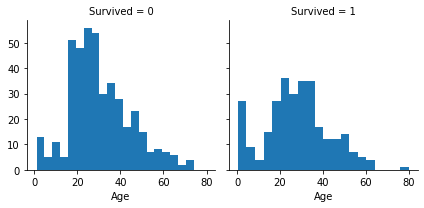

In [36]:
g = sns.FacetGrid(titanic_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [63]:
(titanic_df['Age'].values[5])

nan

#### Наблюдения:

- Дети (Age <=4) имеют большие шансы на выживание
- Пожилые пассажиры (Age = 80) выжили
- Большое число пассажиров юного возраста (15-25) не выжило
- Большая часть пассажиров возраста 15-35 лет.

#### Вывод:
- Возраст важен и нужно его использовать
- Заполнить пропущенные значения
- Разбить признак на группы по интервалам

# Feature engeniiring

Мы не можем использовать имя в обучении модели, однако, мы можем извлечь из него какую-то информацию, например, обращение (Miss, Missis, Mister) или титул (Mme, Lady, Sir)

В общем случае титул можно извлечь из имени, пользуясь **регулярными выражениями**, но решим задачу попроще, когда нам известно множество возможных обращений-титулов:

In [65]:
title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
                    'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
                    'Don', 'Jonkheer']

In [77]:
def substrings_in_string(big_string, substrings):
    ## YOUR CODE

In [98]:
titanic_df['Title'] = titanic_df['Name'].apply(lambda x: substrings_in_string(x, title_list))

In [99]:
pd.crosstab(titanic_df['Title'], titanic_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Major,0,2
Master,0,40
Miss,180,0


In [100]:
titanic_df['Title'] = titanic_df['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', \
                                                   'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
titanic_df['Title'] = titanic_df['Title'].replace('Mlle', 'Miss')
titanic_df['Title'] = titanic_df['Title'].replace('Ms', 'Miss')
titanic_df['Title'] = titanic_df['Title'].replace('Mme', 'Mrs')
    
titanic_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.703297
2,Mr,0.158301
3,Mrs,0.792308
4,Rare,0.285714


In [101]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
titanic_df['Title'] =  ## YOUR CODE
titanic_df['Title'] = titanic_df['Title'].fillna(0)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


Также нам нужно закодировать пол пассажира в 1, 0:

In [ ]:
titanic_df['Sex'] = ## YOUR CODE

### Age

In [131]:
titanic_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

`count != len(titanic_df)`

то есть пропущенные значения и много

In [133]:
len(titanic_df) - 714

177

Обычная практика - заполнить пропущенные значения, например, средним значением признака. Однако их слишком много. Хорошей идеей будет заполнить пропуски средним в некоторой группе, например, по классу пассажира:

In [135]:
titanic_df[titanic_df['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_bin
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,1,
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,3,
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,1,
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,2,
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S,1,
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,3,
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q,2,
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,1,
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C,1,


Теперь разобъем шкалу возрастов на группы (например, на 5 групп):

In [121]:
NUM_BINS = 5

In [120]:
min_age = min(titanic_df['Age'])
max_age = max(titanic_df['Age'])

In [123]:
bin_size = int((max_age - min_age) / NUM_BINS)
bin_size

15

Посчитайте средний возраст в каждом бине:

** Выведите распределение переменной Pclass (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин 2-го класса? **

** Каковы медиана и стандартное отклонение платежей (Fare)? Округлите до 2 десятичных знаков.**

** Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?**

** Найдите самое популярное имя среди пассажиров Титаника мужского пола?**

